<a href="https://colab.research.google.com/github/antonsysoev/comp_tech_PM_2023/blob/main/Practise__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Подключаем пакет, который позволяет запустить R в colab. Разрешаем среде работать в R

In [ ]:
%load_ext rpy2.ipython

1.1 Общие цели

* Загрузим некоторые данные в статистическую программу
* Немного поговорим о том, как представить структурированы данные
* Составим графики данных, чтобы мы могли посмотреть на них и понять их смысл.





Для того чтобы построить график данных, нам нужно сначала иметь какие-то данные... На самом деле, в R это не совсем так. Запустите этот фрагмент кода и посмотрите, что произойдет:

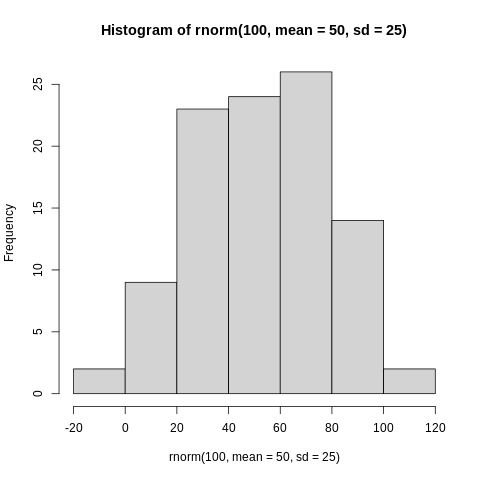

In [ ]:
%%R
hist(rnorm(100, mean=50, sd=25))

Вы просто заставили R создать выборку из 100 чисел, а затем построить результаты в виде гистограммы. Довольно аккуратно.

А пока давайте займемся тем, что может быть немного интереснее... какие фильмы будут сниматься в Нью-Йорке? Оказывается, NYC делает много данных о многих вещах открытыми и бесплатными для всех, кто может скачать и посмотреть. Вот сайт NYC Open Data: https://opendata.cityofnewyork.us. Есть несколько способов загрузить эти данные в R.


In [ ]:
%%R
library(data.table)
nyc_films <-fread("D:/Дисциплины/Прикладная статистика/data/Film_Permits.csv")

In [ ]:
%%R
library(data.table)
nyc_films <- fread("https://raw.githubusercontent.com/CrumpLab/statisticsLab/master/data/Film_Permits.csv")

 [0%] Downloaded 1378 bytes...
 [0%] Downloaded 2756 bytes...
 [0%] Downloaded 4134 bytes...
 [0%] Downloaded 5512 bytes...
 [0%] Downloaded 6890 bytes...
 [0%] Downloaded 8268 bytes...
 [0%] Downloaded 9646 bytes...
 [0%] Downloaded 11024 bytes...
 [0%] Downloaded 12402 bytes...
 [0%] Downloaded 13780 bytes...
 [0%] Downloaded 15158 bytes...
 [0%] Downloaded 16536 bytes...
 [0%] Downloaded 17914 bytes...
 [0%] Downloaded 19292 bytes...
 [0%] Downloaded 20670 bytes...
 [0%] Downloaded 22048 bytes...
 [0%] Downloaded 23426 bytes...
 [0%] Downloaded 24804 bytes...
 [0%] Downloaded 26182 bytes...
 [0%] Downloaded 27560 bytes...
 [0%] Downloaded 28938 bytes...
 [0%] Downloaded 30316 bytes...
 [1%] Downloaded 31694 bytes...
 [1%] Downloaded 33072 bytes...
 [1%] Downloaded 34450 bytes...
 [1%] Downloaded 35828 bytes...
 [1%] Downloaded 37206 bytes...
 [1%] Downloaded 38584 bytes...
 [1%] Downloaded 39962 bytes...
 [1%] Downloaded 41340 bytes...
 [1%] Downloaded 42718 bytes...
 [1%] Downloade

Вы будете загружать и анализировать всевозможные файлы данных. Каждый раз мы будем выполнять одни и те же действия. Эти шаги заключаются в том, чтобы загрузить данные, а затем просмотреть их. Вы хотите увидеть, что у вас есть.

В R-studio в правом верхнем углу экрана, на вкладке среды, вы увидите переменную под названием nyc_films. Если вы нажмете на нее, она покажет вам содержимое данных в новом окне. Данные хранятся в том, что мы называем рамкой данных. Это жаргон R для обозначения того, что содержит данные. Это квадрат, в котором строки идут поперек, а столбцы - вверх и вниз. Это похоже на таблицу Excel, если вы знакомы с Excel.

Полезно знать, что при необходимости вы можете посмотреть на рамку данных таким образом. Но эта рамка данных очень большая, в ней 50 728 строк данных. Это слишком много для просмотра.


Пакет summarytools дает быстрый способ обобщить все данные во фрейме данных. Вот как это делается. Когда вы запустите этот код, вы увидите сводку в окне просмотра справа внизу. Есть маленькая кнопка браузера (стрелка в верхней части маленького окна), которую можно нажать, чтобы развернуть и увидеть все в браузере.

In [ ]:
%%R
summary(nyc_films)

    EventID        EventType         StartDateTime      EndDateTime       
 Min.   : 42069   Length:50728       Length:50728       Length:50728      
 1st Qu.:124336   Class :character   Class :character   Class :character  
 Median :215042   Mode  :character   Mode  :character   Mode  :character  
 Mean   :219367                                                           
 3rd Qu.:313204                                                           
 Max.   :412656                                                           
  EnteredOn         EventAgency        ParkingHeld          Borough         
 Length:50728       Length:50728       Length:50728       Length:50728      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

Где чаще всего запрашиваются разрешения на съемку?
Есть ли у вас какие-нибудь предположения? Это Манхэттен, или Бруклин, или Бронкс? Или Квинс, или Стейтен-Айленд? Мы можем выяснить это, построив данные с помощью гистограммы. Нам просто нужно подсчитать, сколько разрешений на производство фильмов выдано в каждом районе, а затем изобразить эти подсчеты разными столбиками.

Сначала мы подсчитаем данные в R. Выполните следующий код.


In [ ]:
%%R
library(dplyr)

counts <- nyc_films %>%
          group_by(Borough) %>%
          summarize(count_of_permits = length(Borough))

Выше были сгруппированы данные по каждому из пяти районов, а затем подсчитано количество раз, когда встречался каждый район (с помощью функции length). В результате получилась новая переменная count. Я решил назвать эту переменную count. Вы можете видеть, что теперь она отображается в правом верхнем углу на вкладке среды. Если бы вы дали переменной count другое имя, например muppets, то она называлась бы так, как вы ее назвали.

Если вы нажмете на переменную counts, вы увидите список пяти районов, а также подсчеты того, сколько разрешений на показ фильмов было запрошено в каждом районе. Это те цифры, которые мы хотим отобразить на графике.

Для построения графика мы используем фантастический пакет ggplot2. Он очень мощный, как только вы разберетесь с ним, и когда вы разберетесь, вы сможете строить всевозможные интересные графики. Вот код для построения графика

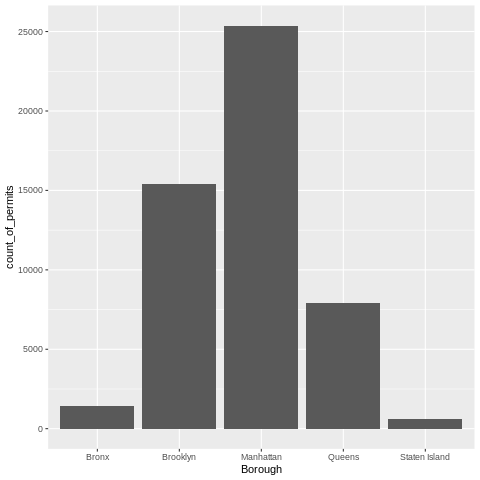

In [ ]:
%%R
library(ggplot2)

ggplot(counts, aes(x = Borough, y = count_of_permits )) +
  geom_bar(stat="identity")

Мы думаем, что вы можете скептически относиться к тому, что вы здесь делаете, копируя и вставляя вещи. Скоро вы увидите, как быстро вы можете делать вещи, копируя и вставляя их, и внося небольшие изменения. Давайте быстро зададим еще один вопрос о том, какие виды фильмов снимаются. Колонка Категория дает нам некоторую информацию об этом. Давайте просто скопируем код, который мы уже сделали, и посмотрим, к каким категориям относятся фильмы. Посмотрите, сможете ли вы определить, что я изменил в коде, чтобы это сработало, я сделаю это все сразу:

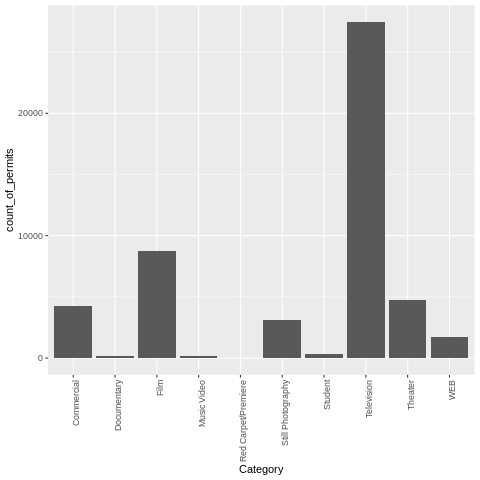

In [ ]:
%%R
counts <- nyc_films %>%
          group_by(Category) %>%
          summarize(count_of_permits = length(Category))

ggplot(counts, aes(x = Category, y = count_of_permits )) +
  geom_bar(stat="identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

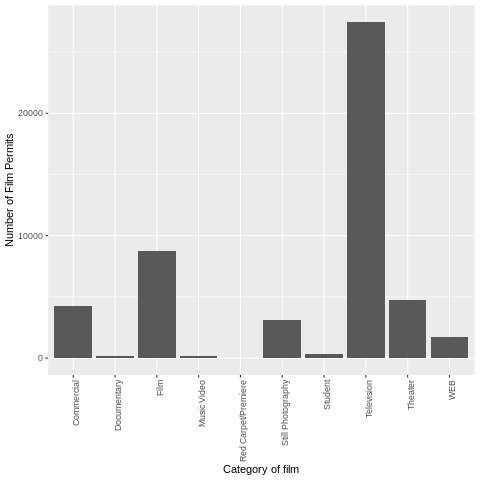

In [ ]:
%%R
counts <- nyc_films %>%
          group_by(Category) %>%
          summarize(count_of_permits = length(Category))

ggplot(counts, aes(x = Category, y = count_of_permits )) +
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Category of film")

Давайте сделаем столбики разного цвета. Для этого добавим новый код внутрь части aes():

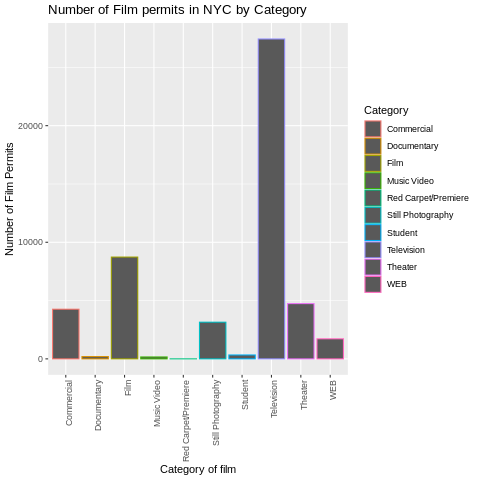

In [ ]:
%%R
ggplot(counts, aes(x = Category, y = count_of_permits, color=Category )) +
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Category of film") +
  ggtitle("Number of Film permits in NYC by Category")

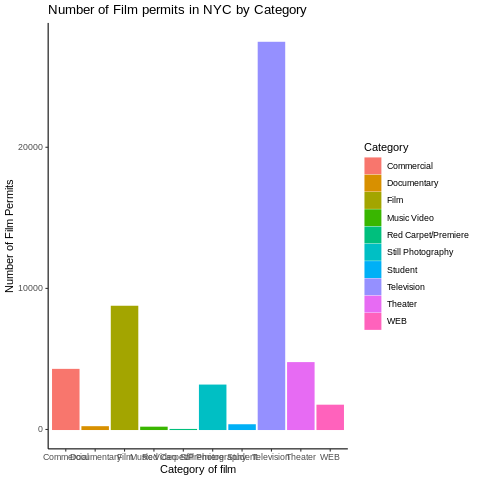

In [ ]:
%%R
ggplot(counts, aes(x = Category, y = count_of_permits,
                   color=Category,
                   fill= Category )) +
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Category of film") +
  ggtitle("Number of Film permits in NYC by Category") +
  theme(legend.position="none") +
  theme_classic()

Обратите внимание, что в кадре данных nyc_films также есть столбец для SubCategoryName. Давайте посмотрим, что там происходит, с помощью быстрого графика.

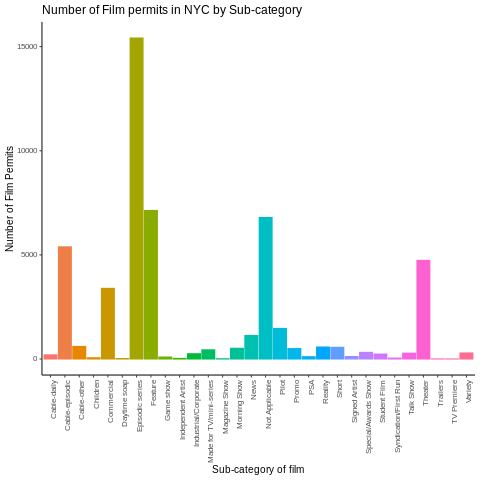

In [ ]:
%%R
counts <- nyc_films %>%
          group_by(SubCategoryName) %>%
          summarize(count_of_permits = length(SubCategoryName))

# make the plot

ggplot(counts, aes(x = SubCategoryName, y = count_of_permits,
                   color=SubCategoryName,
                   fill= SubCategoryName )) +
  geom_bar(stat="identity") +
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Sub-category of film") +
  ggtitle("Number of Film permits in NYC by Sub-category") +
  theme(legend.position="none")

Давайте посмотрим еще одну действительно полезную вещь в ggplot2. Она называется facet_wrap(). Это некрасивое слово, но вы увидите, что оно очень крутое, и с помощью facet_wrap можно делать стили графиков нового уровня, которые другие люди не могут сделать очень легко.

Вот наш вопрос. Мы знаем, что некоторые фильмы снимаются в разных районах, и что одни и те же фильмы снимаются в разных категориях, но есть ли в разных районах разные модели для категорий фильмов, на которые они запрашивают разрешения? Больше ли в Бруклине снимается телешоу? Как мы можем это выяснить? Смотрите, вот так:

`summarise()` has grouped output by 'Borough'. You can override using the `.groups` argument.


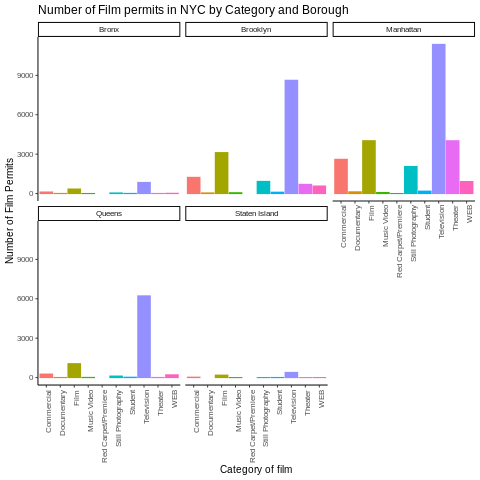

In [ ]:
%%R
# get the counts (this is a comment it's just here for you to read)

counts <- nyc_films %>%
          group_by(Borough,Category) %>%
          summarize(count_of_permits = length(Category))

# make the plot

ggplot(counts, aes(x = Category, y = count_of_permits,
                   color=Category,
                   fill= Category )) +
  geom_bar(stat="identity") +
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Category of film") +
  ggtitle("Number of Film permits in NYC by Category and Borough") +
  theme(legend.position="none") +
  facet_wrap(~Borough, ncol=3)

Мы сделали две важные вещи. Во-первых, мы добавили боро и категорию в функцию group_by(). Это автоматически дает отдельные подсчеты для каждой категории фильмов, для каждого района. Затем мы добавили facet_wrap(~Borough, ncol=3) в конец графика, и он автоматически нарисовал нам 5 различных гистограмм, по одной для каждого района! Это было быстро. Представьте себе, как это сделать вручную.

Самое приятное в этом то, что мы можем поменять все местами, если захотим. Например, мы можем сделать это таким образом, поменяв категорию с районом, а фасетную обертку сделать по категории, а не по району, как мы делали выше. Делайте то, что подходит именно вам.


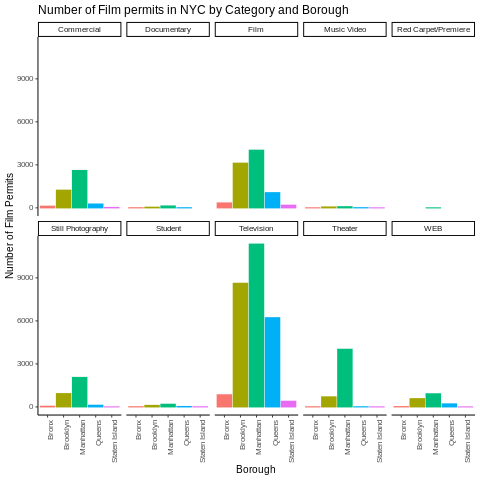

In [ ]:
%%R
ggplot(counts, aes(x = Borough, y = count_of_permits,
                   color=Borough,
                   fill= Borough )) +
  geom_bar(stat="identity") +
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Number of Film Permits") +
  xlab("Borough") +
  ggtitle("Number of Film permits in NYC by Category and Borough") +
  theme(legend.position="none") +
  facet_wrap(~Category, ncol=5)